<a href="https://colab.research.google.com/github/Eric-BR2001/DataScience/blob/master/Quarentena_Aula_2(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId","nome","generos"]
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]

notas_medias = avaliacoes.groupby("filmeId")["nota"].mean().round(2)
filmes_com_media = filmes.join(notas_medias, on="filmeId")
quantidade_notas = avaliacoes.groupby("filmeId").count()[["nota"]].astype('Int64')
quantidade_notas = quantidade_notas.rename(columns={'nota':'qtdeAvaliacoes'})
filmes_com_media = filmes_com_media.join(quantidade_notas, on="filmeId")

## Desafio 1: Rotacionar os Thicks(45°)


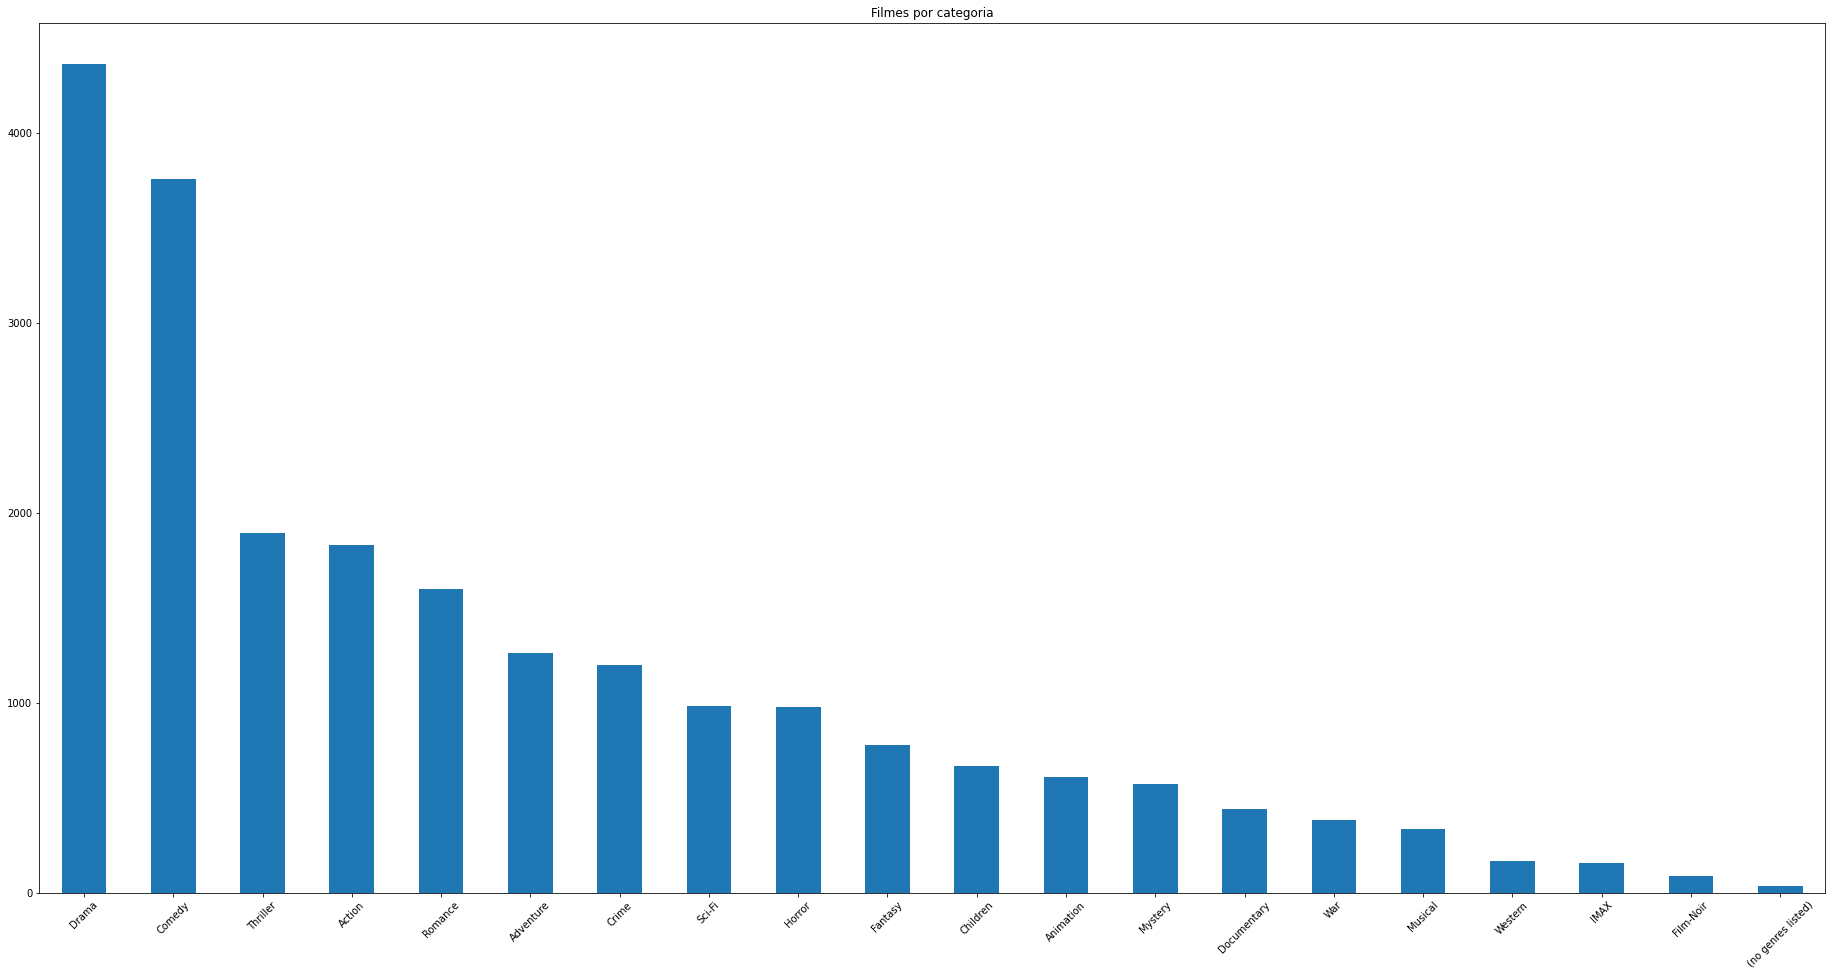

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(32,16)
    )
plt.xticks(rotation=45)
plt.show()

## Desafio 2: Comparar outros filmes com notas semelhantes e achar distribuições diferentes


In [0]:
def plot_filme(n):
  # notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  # notas_do_filme.plot(kind='hist')
  # plt.show()
  # print('\n')
  # notas_do_filme.plot.box()
  # plt.show()
  # return notas_do_filme.describe()

  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  titulo = filmes.query(f"filmeId=={n}")["nome"]
  print("Título:", titulo.values[0])
  print('\n')
  print(notas_do_filme.describe())
  print('\n')
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
  notas_do_filme.plot(ax=ax1, kind='hist', subplots=True)
  notas_do_filme.plot.box(ax=ax2, subplots=True)
  plt.show()

Shawshank Redemption, The (1994)
Título: Shawshank Redemption, The (1994)


count    317.000000
mean       4.429022
std        0.713019
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




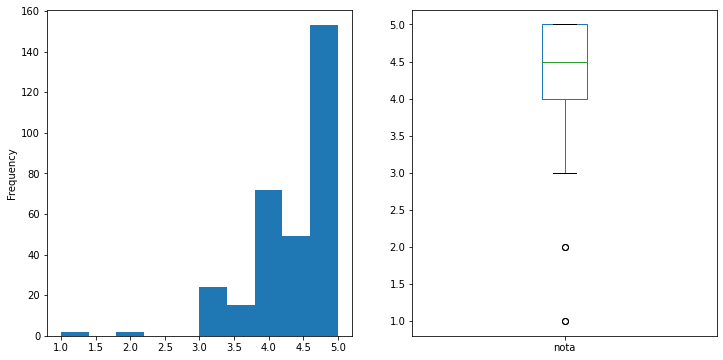

Fight Club (1999)
Título: Fight Club (1999)


count    218.000000
mean       4.272936
std        0.861384
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




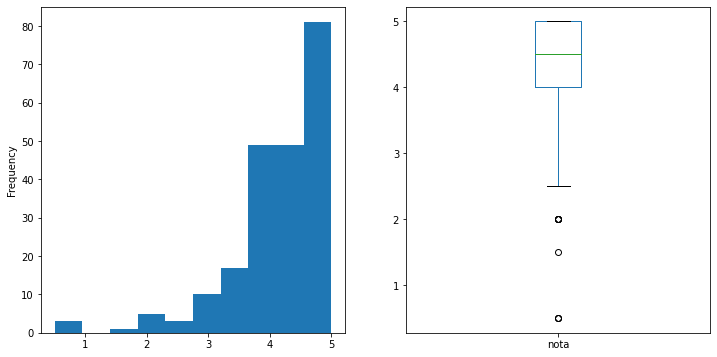

Usual Suspects, The (1995)
Título: Usual Suspects, The (1995)


count    204.000000
mean       4.237745
std        0.800921
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




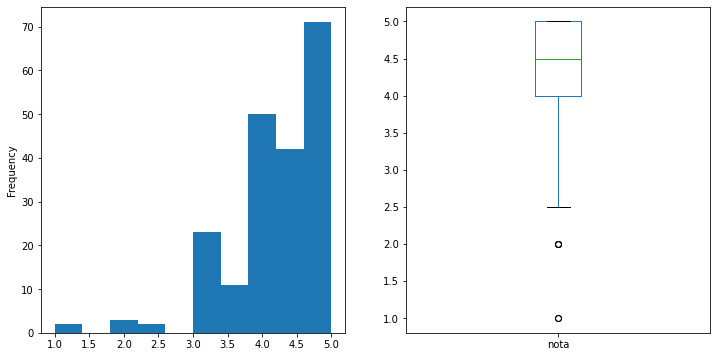

Star Wars: Episode IV - A New Hope (1977)
Título: Star Wars: Episode IV - A New Hope (1977)


count    251.000000
mean       4.231076
std        0.872004
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




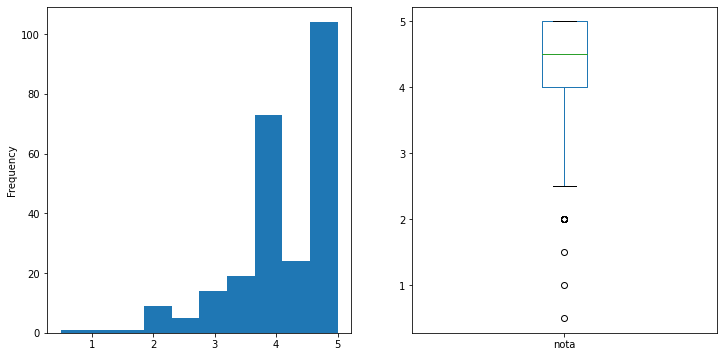

Star Wars: Episode V - The Empire Strikes Back (1980)
Título: Star Wars: Episode V - The Empire Strikes Back (1980)


count    211.000000
mean       4.215640
std        0.842158
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




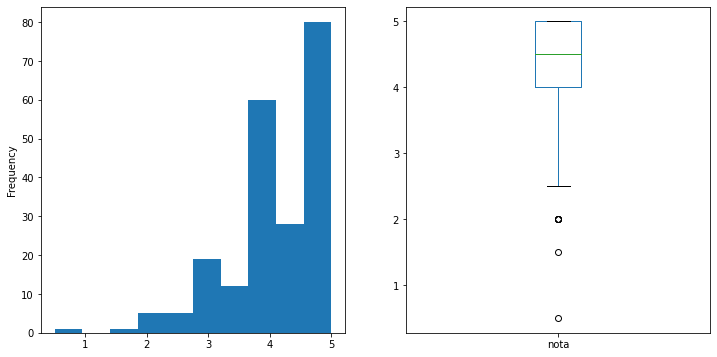

Schindler's List (1993)
Título: Schindler's List (1993)


count    220.000000
mean       4.225000
std        0.975996
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




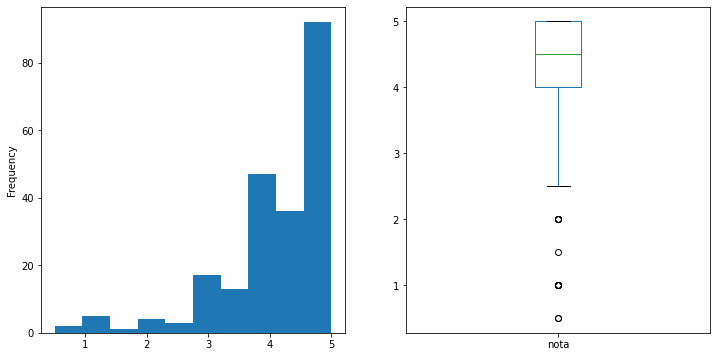

Pulp Fiction (1994)
Título: Pulp Fiction (1994)


count    307.000000
mean       4.197068
std        0.951997
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




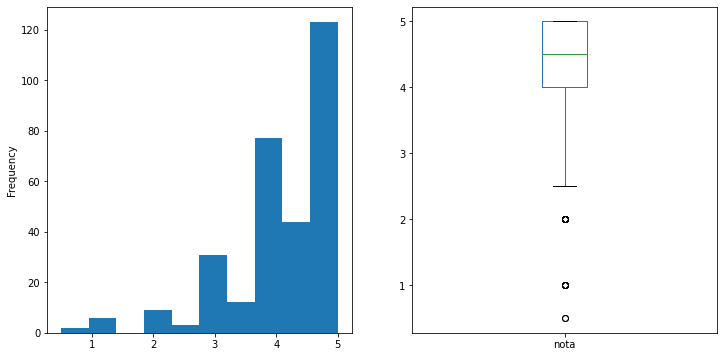

Matrix, The (1999)
Título: Matrix, The (1999)


count    278.000000
mean       4.192446
std        0.975243
min        0.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




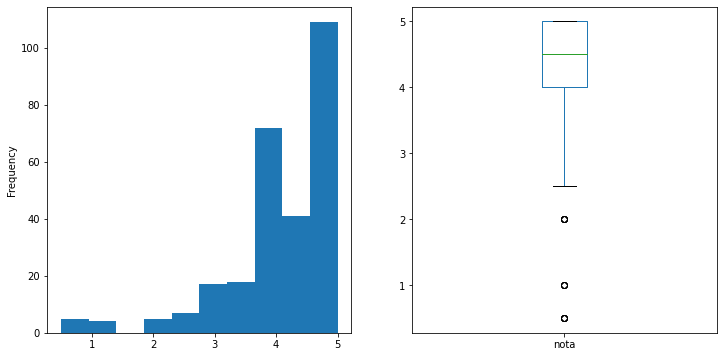

Forrest Gump (1994)
Título: Forrest Gump (1994)


count    329.000000
mean       4.164134
std        0.831244
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




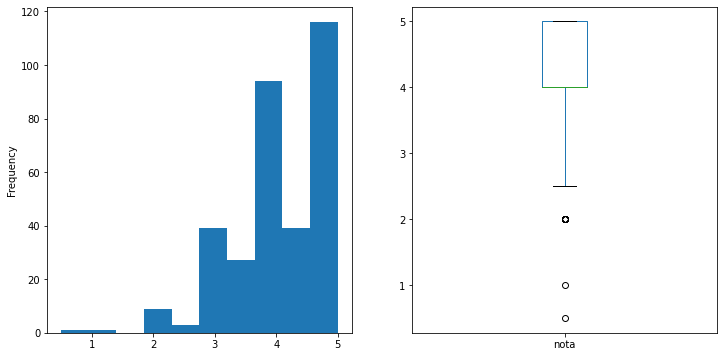

Silence of the Lambs, The (1991)
Título: Silence of the Lambs, The (1991)


count    279.000000
mean       4.161290
std        0.853983
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




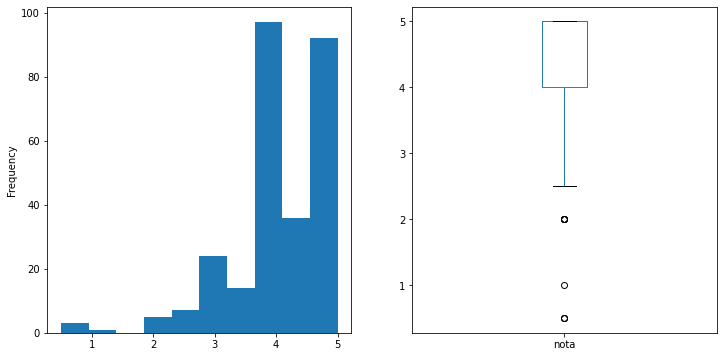

In [0]:
desafio_2 = (filmes_com_media[filmes_com_media.qtdeAvaliacoes > 200]).sort_values("nota", ascending=False).head(10)

for index, row in desafio_2.iterrows():
  print(row['nome'])
  plot_filme(row['filmeId'])




## Desafio3: Criar o boxplot dos 10 filmes com mais votos


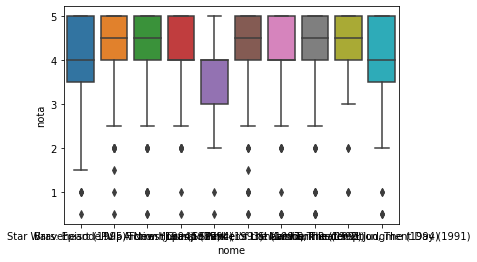

In [0]:
desafio_3 = (filmes_com_media).sort_values("qtdeAvaliacoes", ascending=False).head(10)
keys = list(desafio_3.columns.values)
i1 = avaliacoes.set_index(['filmeId']).index
i2 = desafio_3.set_index(['filmeId']).index
desafio_3 = avaliacoes[i1.isin(i2)]
desafio_3 = desafio_3.merge(filmes, on = 'filmeId', how='left')
sns.boxplot(data = desafio_3, x ="nome", y="nota")

## Desafio 4: O Boxplot estar num tamanho adequado e com os nomes dos filmes nos ticks


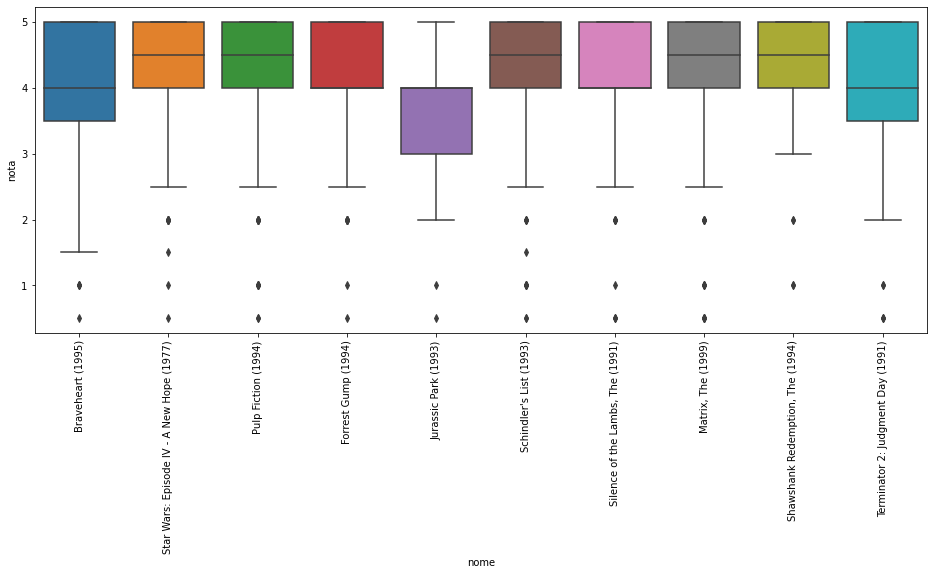

In [0]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
sns.boxplot(data = desafio_3, x ="nome", y="nota")

## Desafio 5: Calcular moda, média e mediana. Tentar encontrar filmes com moda próxima de 0 e 5

In [0]:
d = []
filmes_com_media.head()
#filmesAux = filmes_com_media[~filmes_com_media.nota.isnull()]
#filmesAux.head()
filmesAux = filmes_com_media[filmes_com_media.qtdeAvaliacoes > 50]
#for f in filmesAux.filmeId.to_list():
for index, row in filmesAux.iterrows(): 
  aux = (avaliacoes[avaliacoes.filmeId == row['filmeId']])
  d.append(
      {
          'filmeId' : row['filmeId']
        , 'nome'    : row['nome']
        , 'qtdNotas': row['qtdeAvaliacoes']
        , 'media'   : aux['nota'].mean()
        , 'mediana' : aux.loc[:,'nota'].median()
        , 'moda'    : aux.loc[:,'nota'].mode()[0]
      })

filmesComEstatisticas = pd.DataFrame(d)

In [0]:
filmesComEstatisticas[filmesComEstatisticas.moda >= 4.5].sort_values("moda", ascending=False).head(10)

,filmeId,nome,qtdNotas,media,mediana,moda
18,50,"Usual Suspects, The (1995)",204,4.237745,4.5,5.0
241,2395,Rushmore (1998),56,3.544643,3.5,5.0
23,110,Braveheart (1995),237,4.031646,4.0,5.0
156,1221,"Godfather: Part II, The (1974)",129,4.259690,4.5,5.0
158,1225,Amadeus (1984),76,4.184211,4.0,5.0
159,1230,Annie Hall (1977),58,3.870690,4.0,5.0
163,1247,"Graduate, The (1967)",79,4.063291,4.0,5.0
164,1252,Chinatown (1974),59,4.211864,4.5,5.0
182,1387,Jaws (1975),91,4.005495,4.0,5.0
209,1732,"Big Lebowski, The (1998)",106,3.924528,4.0,5.0


In [0]:
filmesComEstatisticas[filmesComEstatisticas.moda <= 2.5].sort_values("moda", ascending=True).head(10)

,filmeId,nome,qtdNotas,media,mediana,moda
262,2710,"Blair Witch Project, The (1999)",64,2.796875,3.0,1.0
9,19,Ace Ventura: When Nature Calls (1995),88,2.727273,3.0,2.0
35,172,Johnny Mnemonic (1995),53,2.679245,3.0,2.0
116,788,"Nutty Professor, The (1996)",82,2.731707,3.0,2.0


## Desafio 6: Plotar o boxplot e o histograma um ao lado do outro

Título: Godfather: Part II, The (1974)


count    129.000000
mean       4.259690
std        0.803072
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64




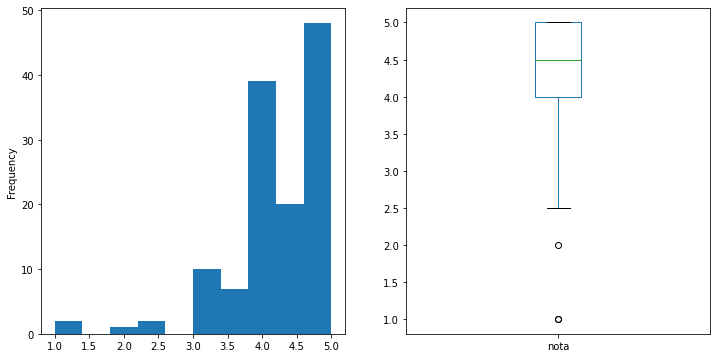

In [0]:
plot_filme(1221)


## Desafio 7: Gráfico de notas médias por ano

In [0]:
filmesComEstatisticas['ano'] = filmesComEstatisticas['nome'].str.extract(r"\(([0-9]+)\)", expand=True)

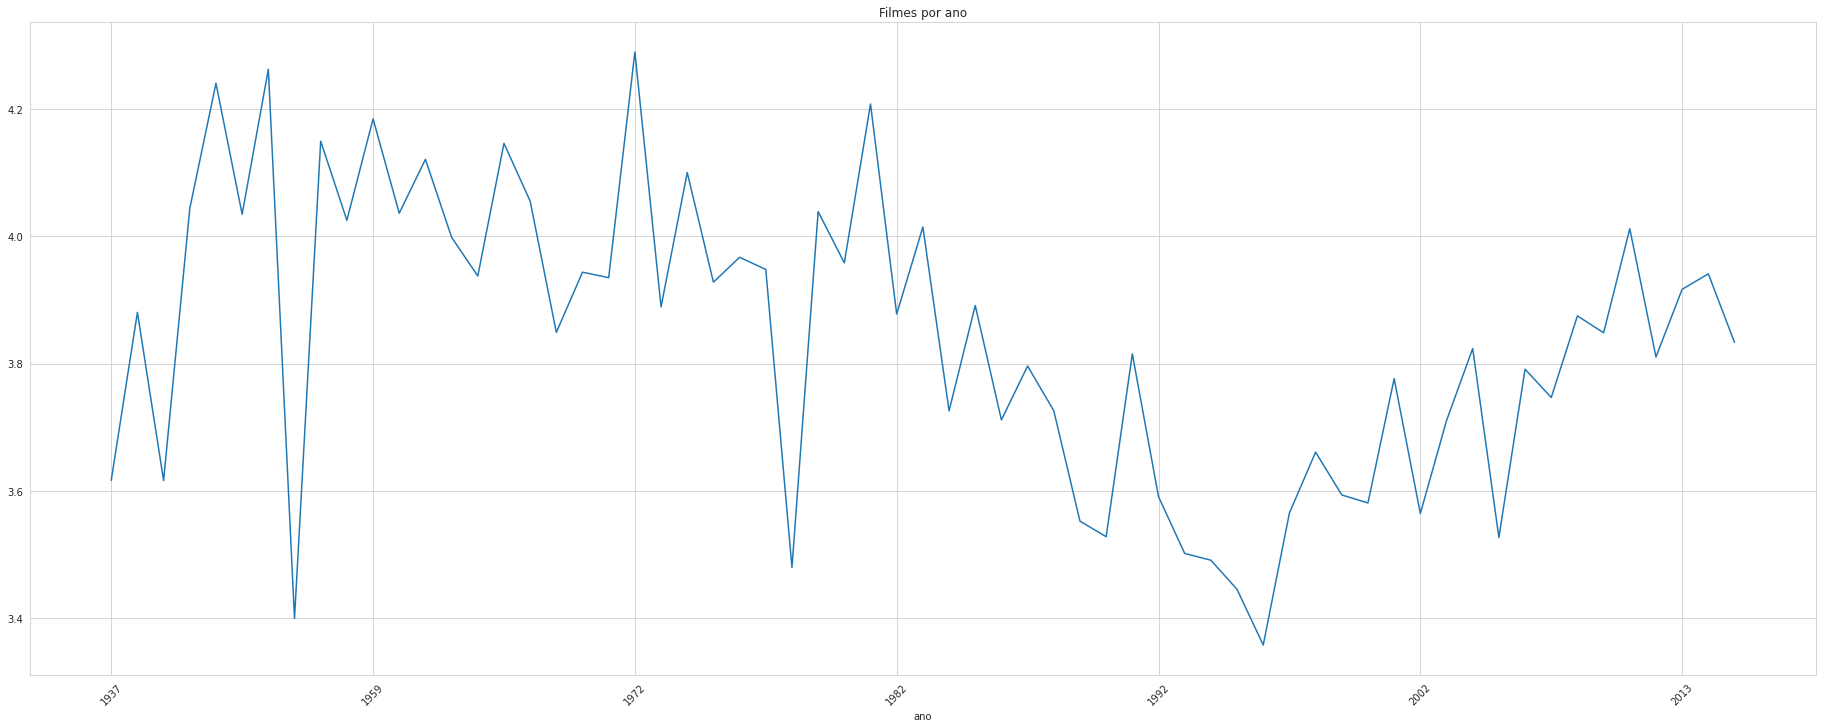

In [0]:
# filmesAno = filmesComEstatisticas[~filmesComEstatisticas.ano.isnull()]
# filmesAno = filmesAno.sort_values('ano', ascending=True).groupby('ano')['media'].mean().head()
sns.set_style("whitegrid")
filmesAno = filmesComEstatisticas.sort_values('ano', ascending=True).groupby('ano')['media'].mean()
filmesAno.plot(
    title='Filmes por ano',
    figsize=(32,12)
    )
plt.xticks(rotation=45)
plt.show()